## Author: Shrikant U
***

 # The Sparks Foundation
 ***

 ## Data Science & Business Analytics Intern

 ## Task 6: Classification using decision tree model
***
Probelm Statement:Classification using decision tree model

***

# Step 1: Importing all required libraries...

In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprocessing...

In [3]:
# dataset loading

data = pd.read_csv('Iris.csv')

# creating data copy
dataset = data.copy()

# checking out first 5 rows from dataset..
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dropping 'ID' column. Since it is not important

dataset.drop(['Id'], axis=1, inplace=True)

In [5]:
# Checking dataset sahpe i.e. no. of rows and columns respectively.

dataset.shape

(150, 5)

In [6]:
# Checking dataset column datatypes.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# checking unique values form Species Column

dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Checking for null values.

dataset.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Conclusion(step 2): 
* No null values present in dataset
* All datatypes in int & float datatype.
* we can proceed for next steps

# Step 3: EDA

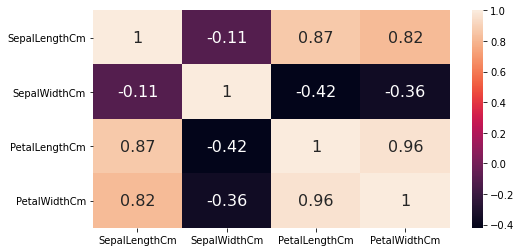

In [9]:
# Correlation matrix heatmap.

plt.figure(figsize=(8,4))
sns.heatmap(dataset.corr(), annot=True, annot_kws={'size':16})
plt.show()

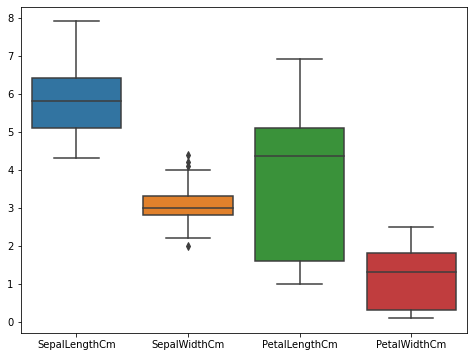

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data= dataset.iloc[:,0:4])
plt.xticks(ticks=[0,1,2,3], labels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.show()

In [11]:
# Counting Species value counts..

data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Step 4: train_test_split

In [13]:
x = dataset.drop(['Species'],axis=1)
y = dataset['Species']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3, stratify=y)

# Step 5: Decision tree...
***

## 5.1 Finding good ccp_alph parameter

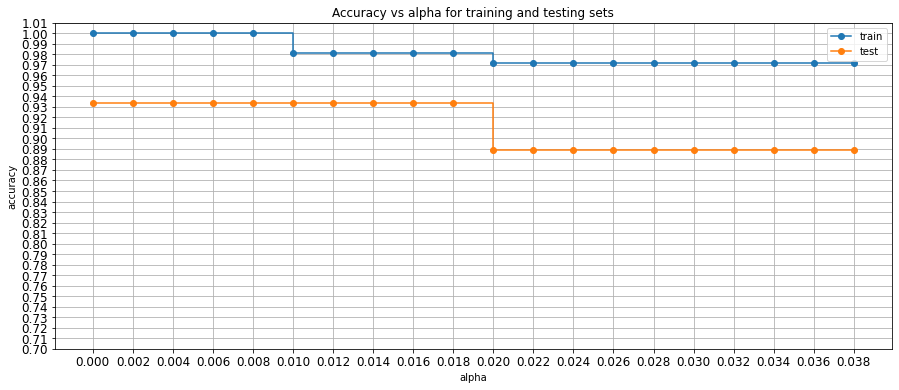

In [60]:
def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    
    
    ccp_alphas = np.arange(0.000, 0.040, 0.002)
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(x_train, y_train) for clf in clfs]
    test_scores = [clf.score(x_test, y_test) for clf in clfs]

    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.set_xticks(np.arange(0.000,0.040, 0.002))
    ax.set_yticks(np.arange(0.70,1.01, 0.01))
    ax.legend()
    plt.grid(True)
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.show()

find_alpha(x_train, x_test, y_train, y_test)

## 5.2 Model Building...

In [61]:
def model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.010):
    
    print()
    
    # importing required libraries
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # creating classifier object/instance
    global model
    model = DecisionTreeClassifier(random_state=42, ccp_alpha = ccp_alpha_value)
    
    # fit model on train datasets
    model.fit(x_train, y_train)
    
    # train & test scores i.e. accuracy
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # model prediction on x_train & x_test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # classification report
    train_classification = classification_report(y_train, y_train)
    test_classification = classification_report(y_test, y_test)
    
    # TRAIN DATA OUTPUTS..
    print('train_score:', train_score)
    print()
    
    print('CONFUSION MATRIX FOR TRAIN DATA')
    figure1, ax1 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(train_cm, annot=True, ax = ax1, fmt = 'g')
    plt.show()
    print()
    
    print('Classification report for train data')
    print(train_classification)
    print('-'*60)
    
     # TEST DATA OUTPUTS..
    print('test_score:', test_score)
    print()
    print('CONFUSION MATRIX FOR TEST DATA')
    figure, ax2 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
    plt.show()
    
    print('Classification report for test data')
    print(test_classification)
    print('-'*60)
    
    print('SUMMARY:','train score:',train_score,',', 'test score:', test_score)
    print('model_paramter:', model)
    
    
    # TREE PLOT 
    from sklearn import tree

    features = list(x.columns)
    classes = list(y.unique())

    fig, axex = plt.subplots(nrows=1, ncols=1,figsize=(20,10), dpi=300)
    tree.plot_tree(model,feature_names= features, class_names=classes, filled=True)
    plt.show()
    
    
    from sklearn.tree import export_text
    r = export_text(model, feature_names=features)
    print(r)
    
    print('FEATURE IMPORATNCE:')
    feature_importance = pd.DataFrame({'features':x.columns,'feature_imp':model.feature_importances_})

    plt.figure(figsize=(15,6))
    sns.barplot(x='features', y='feature_imp',\
                data = feature_importance.sort_values(by='feature_imp', ascending=False))
    plt.show()


train_score: 1.0

CONFUSION MATRIX FOR TRAIN DATA


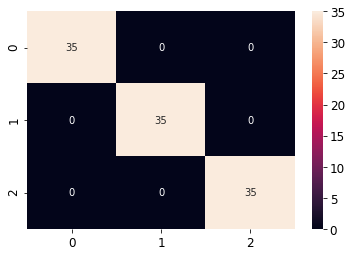

<Figure size 720x576 with 0 Axes>


Classification report for train data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

------------------------------------------------------------
test_score: 0.9333333333333333

CONFUSION MATRIX FOR TEST DATA


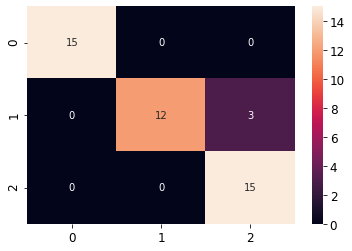

<Figure size 720x576 with 0 Axes>

Classification report for test data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

------------------------------------------------------------
SUMMARY: train score: 1.0 , test score: 0.9333333333333333
model_paramter: DecisionTreeClassifier(random_state=42)


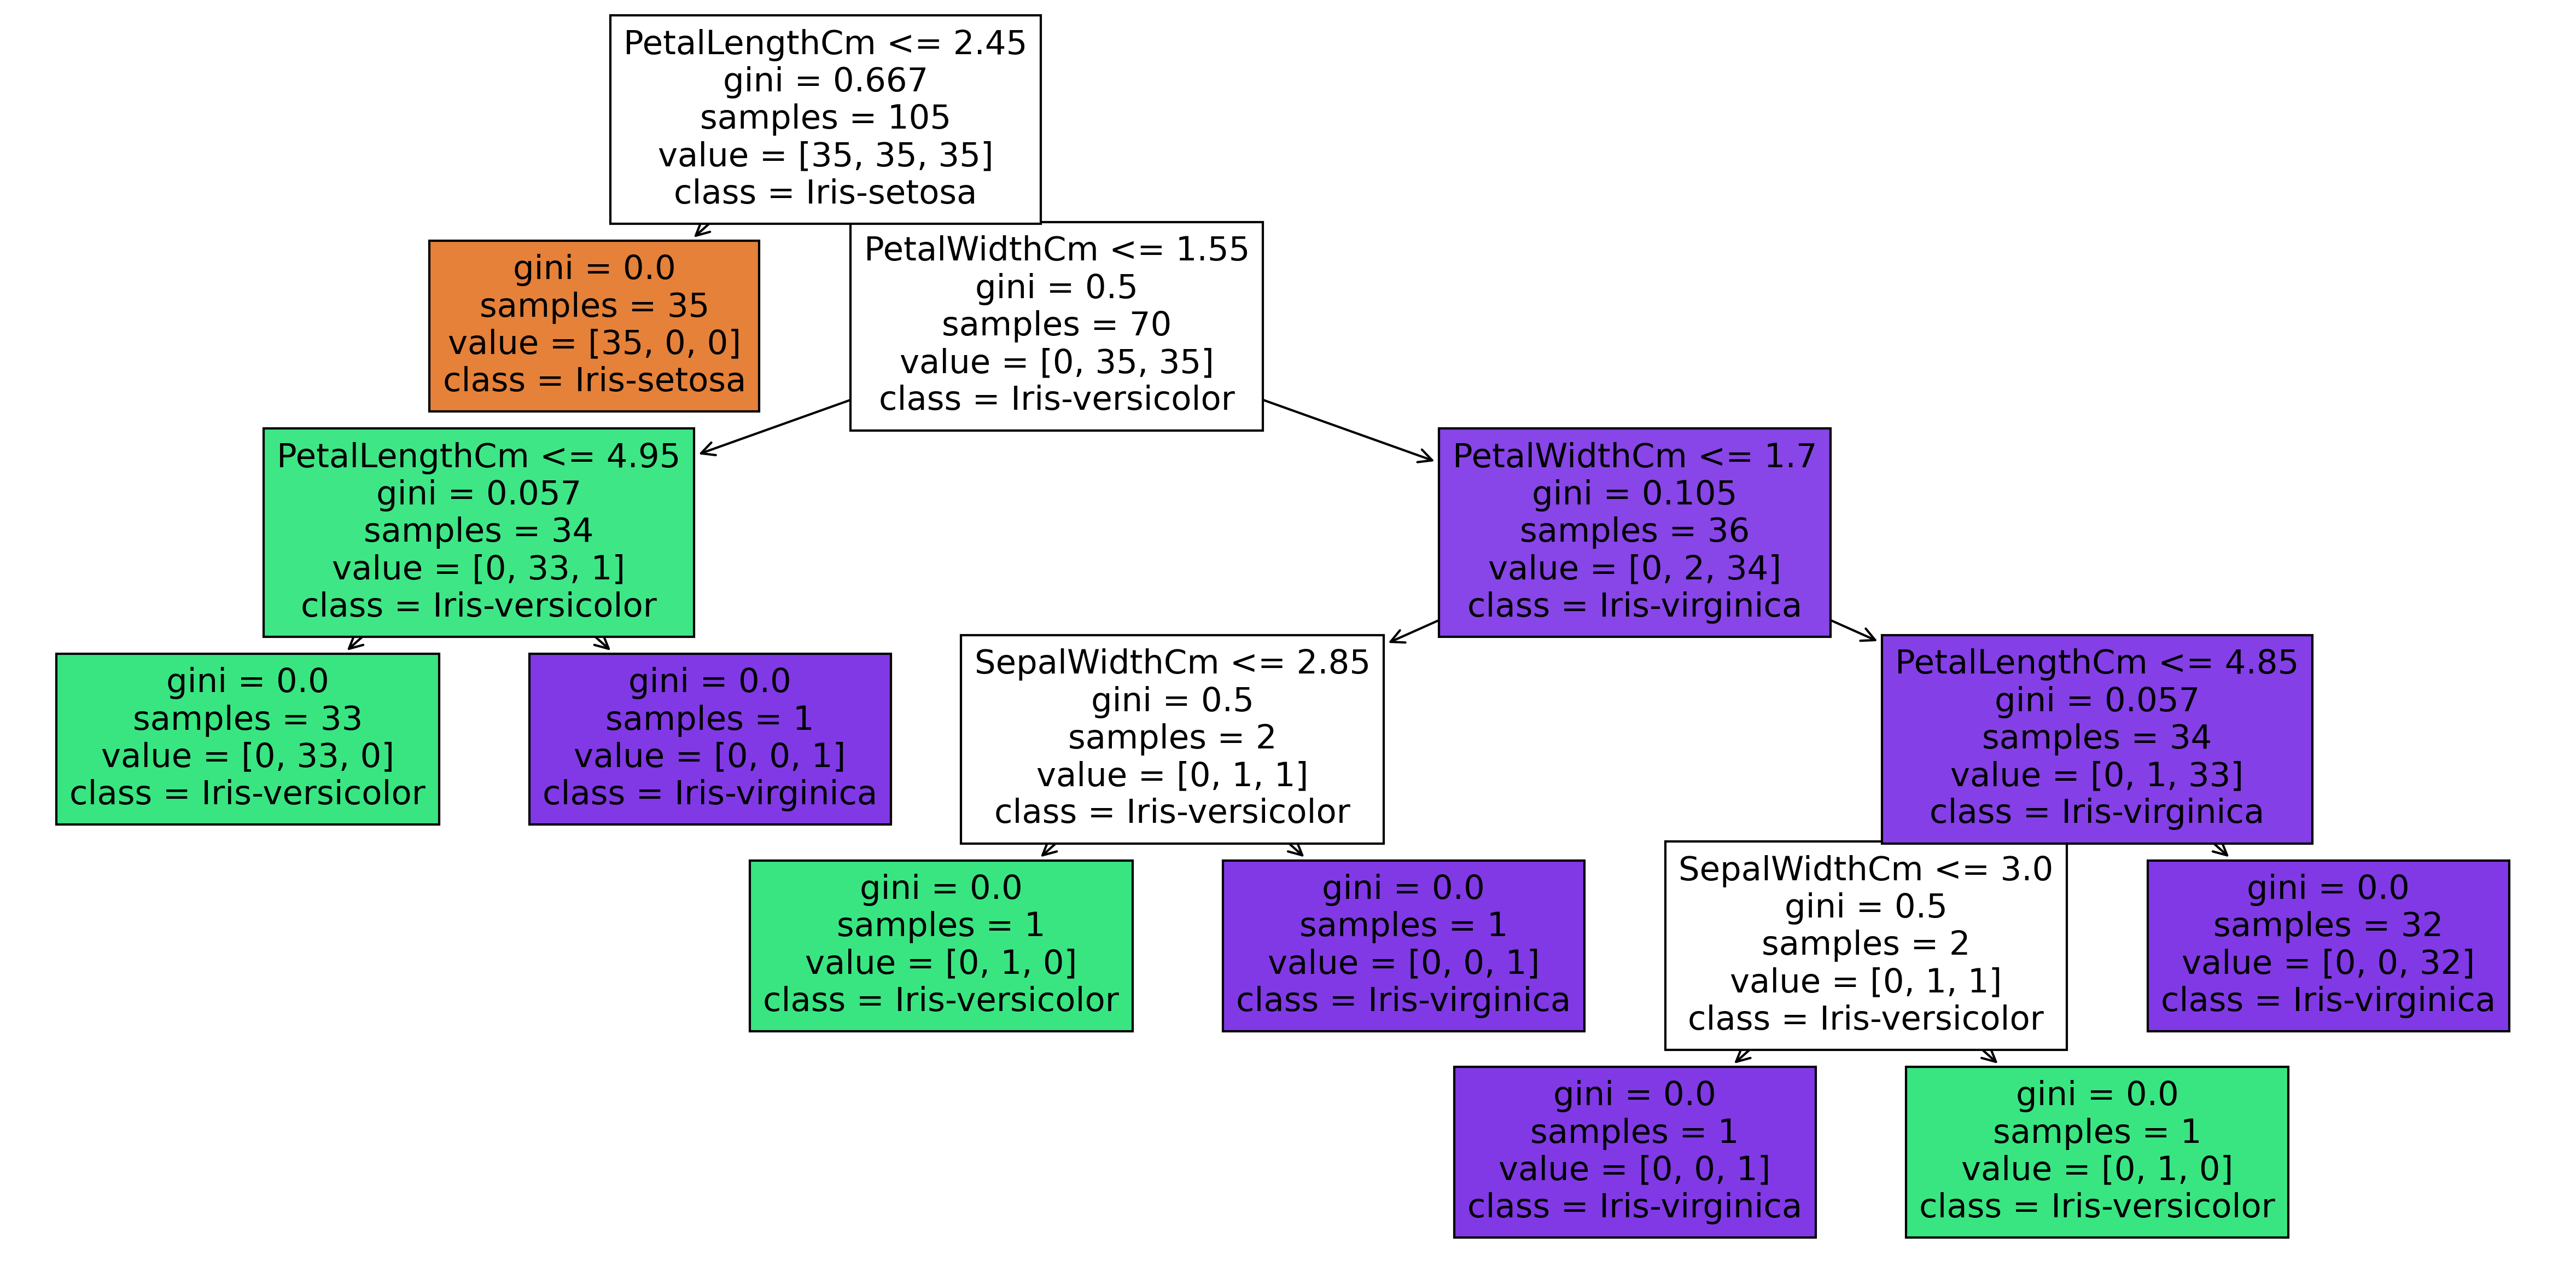

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.55
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.55
|   |   |--- PetalWidthCm <= 1.70
|   |   |   |--- SepalWidthCm <= 2.85
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalWidthCm >  2.85
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidthCm >  1.70
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.00
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- SepalWidthCm >  3.00
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: Iris-virginica

FEATURE IMPORATNCE:


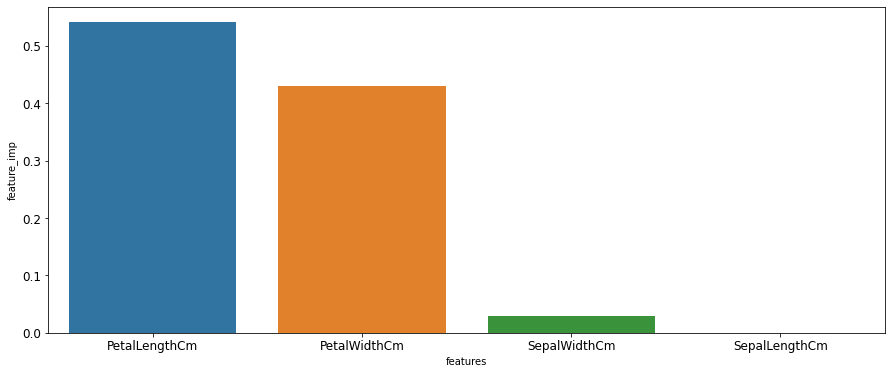

In [62]:
model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.0)

# Step 6: User Interface

In [97]:

def predict_result():
    
    paramters = x.columns
    inputs = []
    for i in paramters:
        inputs_entered = float(input('Please enter {}:'.format(i)))
        print()
        inputs.append(inputs_entered)

    result = model.predict(np.array(inputs).reshape(1,-1))

    for i in result:
        print('predicted result:', i)